In [1]:
import pandas as pd

data = pd.read_csv('/kaggle/input/lung-sounds/lung_disease_sounds.csv')

In [2]:
data.head()

,filename,prediction,confidence
0,"EP76_N,N,A L U,31,M.wav",Animal,0.111295
1,"EP93_N,N,P R M,75,M.wav",Noise,0.165300
2,"BP13_Heart Failure,C,P L L,55,M.wav","Heart sounds, heartbeat",0.263579
3,"BP23_Lung Fibrosis,Crep,P R L ,50,M.wav","Heart sounds, heartbeat",0.395513
4,"EP67_heart failure,Crep,P R L ,24,F.wav","Heart sounds, heartbeat",0.395424


In [3]:
# Filter rows where the prediction contains 'Heart sounds, heartbeat'
heart_sounds_count = data[data['prediction'].str.contains('Heart sounds, heartbeat', na=False)].shape[0]
heart_sounds_count

100

In [4]:
# Calculate the percentage of 'Heart sounds, heartbeat'
total_count = data.shape[0]
heart_sounds_percentage = (heart_sounds_count / total_count) * 100

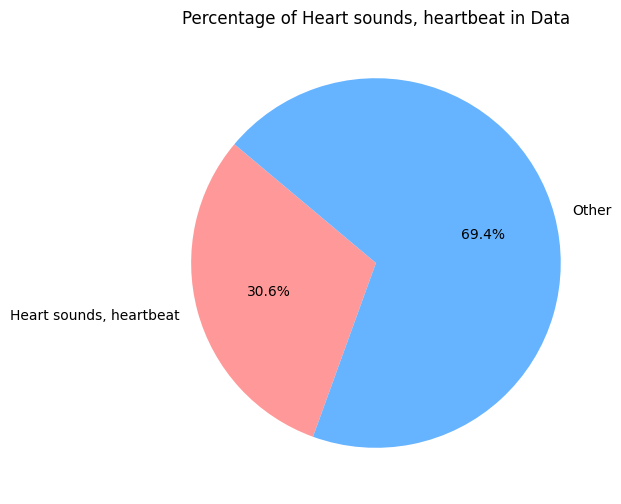

In [5]:
# Visualize percentage of Heart sounds, heartbeat in data
import matplotlib.pyplot as plt

labels = ['Heart sounds, heartbeat', 'Other']
sizes = [heart_sounds_percentage, 100 - heart_sounds_percentage]
colors = ['#ff9999','#66b3ff']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Heart sounds, heartbeat in Data')
plt.show()

In [6]:
# Calculate the count of other sound predictions
other_sounds_count = total_count - heart_sounds_count
other_sounds_count

227

In [7]:
# Filter rows where the prediction contains 'Heart sounds, heartbeat' 
heart_sounds_data = data[data['prediction'].str.contains('Heart sounds, heartbeat', na=False)]
heart_sounds_data

,filename,prediction,confidence
2,"BP13_Heart Failure,C,P L L,55,M.wav","Heart sounds, heartbeat",0.263579
3,"BP23_Lung Fibrosis,Crep,P R L ,50,M.wav","Heart sounds, heartbeat",0.395513
4,"EP67_heart failure,Crep,P R L ,24,F.wav","Heart sounds, heartbeat",0.395424
12,"EP21_BRON,Crep,P R L ,20,M.wav","Heart sounds, heartbeat",0.349122
13,"BP69_pneumonia,Bronchial,P R L ,64,M.wav","Heart sounds, heartbeat",0.347329
...,...,...,...
311,"BP6_Plueral Effusion,I C B,P L R,81,M.wav","Heart sounds, heartbeat",0.720580
312,"BP8_Plueral Effusion,I C B,P L L,70,M.wav","Heart sounds, heartbeat",0.236112
315,"BP54_heart failure,Crep,P R L ,73,F.wav","Heart sounds, heartbeat",0.204256
316,"EP112_N,N,P L M,30,M.wav","Heart sounds, heartbeat",0.335270


In [8]:
# Define a threshold for confidence score to classify healthy and not healthy sounds
threshold = 0.5

# Classify sounds based on confidence score
heart_sounds_data['health_status'] = heart_sounds_data['confidence'].apply(lambda x: 'Healthy' if x >= threshold else 'Not Healthy')
heart_sounds_data

<ipython-input-8-faf52ccc7127>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_sounds_data['health_status'] = heart_sounds_data['confidence'].apply(lambda x: 'Healthy' if x >= threshold else 'Not Healthy')


,filename,prediction,confidence,health_status
2,"BP13_Heart Failure,C,P L L,55,M.wav","Heart sounds, heartbeat",0.263579,Not Healthy
3,"BP23_Lung Fibrosis,Crep,P R L ,50,M.wav","Heart sounds, heartbeat",0.395513,Not Healthy
4,"EP67_heart failure,Crep,P R L ,24,F.wav","Heart sounds, heartbeat",0.395424,Not Healthy
12,"EP21_BRON,Crep,P R L ,20,M.wav","Heart sounds, heartbeat",0.349122,Not Healthy
13,"BP69_pneumonia,Bronchial,P R L ,64,M.wav","Heart sounds, heartbeat",0.347329,Not Healthy
...,...,...,...,...
311,"BP6_Plueral Effusion,I C B,P L R,81,M.wav","Heart sounds, heartbeat",0.720580,Healthy
312,"BP8_Plueral Effusion,I C B,P L L,70,M.wav","Heart sounds, heartbeat",0.236112,Not Healthy
315,"BP54_heart failure,Crep,P R L ,73,F.wav","Heart sounds, heartbeat",0.204256,Not Healthy
316,"EP112_N,N,P L M,30,M.wav","Heart sounds, heartbeat",0.335270,Not Healthy


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode 'prediction' & health_status columns
heart_sounds_data['prediction_encoded'] = label_encoder.fit_transform(heart_sounds_data['prediction'])

heart_sounds_data['health_status_encoded'] = label_encoder.fit_transform(heart_sounds_data['health_status'])

<ipython-input-9-dc1168c1b415>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_sounds_data['prediction_encoded'] = label_encoder.fit_transform(heart_sounds_data['prediction'])
<ipython-input-9-dc1168c1b415>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_sounds_data['health_status_encoded'] = label_encoder.fit_transform(heart_sounds_data['health_status'])


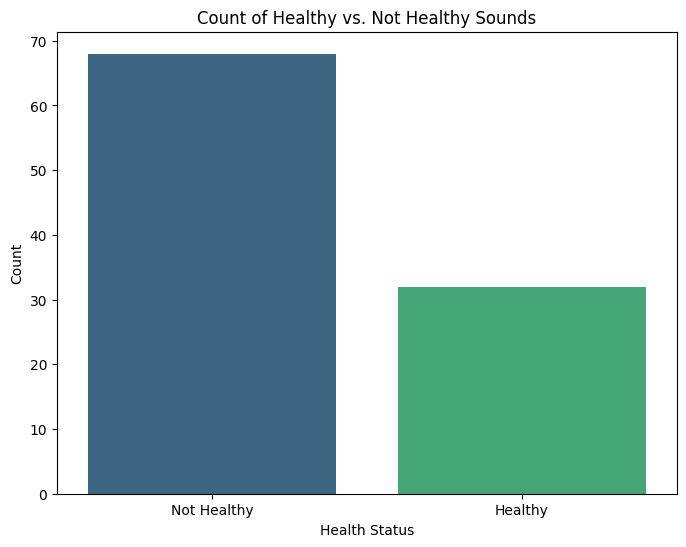

In [10]:
# Visualize the count of healthy vs. not healthy sounds 

import seaborn as sns

# Count the occurrences of each health status
health_status_counts = heart_sounds_data['health_status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=health_status_counts.index, y=health_status_counts.values, palette='viridis')
plt.title('Count of Healthy vs. Not Healthy Sounds')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

In [11]:
# Set up X (features) and y (target)
X = heart_sounds_data['prediction_encoded']
y = heart_sounds_data['health_status_encoded']

In [12]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test

(57     0
 158    0
 312    0
 42     0
 238    0
       ..
 212    0
 232    0
 55     0
 307    0
 189    0
 Name: prediction_encoded, Length: 75, dtype: int64,
 264    0
 194    0
 231    0
 165    0
 164    0
 156    0
 91     0
 258    0
 45     0
 2      0
 78     0
 126    0
 239    0
 133    0
 302    0
 13     0
 244    0
 245    0
 52     0
 129    0
 196    0
 291    0
 107    0
 160    0
 230    0
 Name: prediction_encoded, dtype: int64,
 57     1
 158    1
 312    1
 42     1
 238    1
       ..
 212    1
 232    1
 55     0
 307    0
 189    1
 Name: health_status_encoded, Length: 75, dtype: int64,
 264    1
 194    1
 231    0
 165    1
 164    1
 156    0
 91     1
 258    0
 45     1
 2      1
 78     1
 126    1
 239    1
 133    0
 302    1
 13     1
 244    1
 245    1
 52     1
 129    0
 196    1
 291    0
 107    1
 160    1
 230    0
 Name: health_status_encoded, dtype: int64)

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert y to categorical for multi-class classification
y_categorical = to_categorical(y)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store all predictions and true labels
all_predictions = []
all_true_labels = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
    X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

    # Define the neural network model architecture
    def build_model(input_dim, num_classes):
        model = Sequential()
        model.add(Dense(64, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy')
        return model

    # Build and train the model
    model = build_model(input_dim=X_train_scaled.shape[1], num_classes=y_train.shape[1])

    # Early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

    # Train the model
    model.fit(
        X_train_scaled, y_train,
        epochs=5, batch_size=32,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stop], verbose=1
    )

    # Predict probabilities on the test set
    y_pred_proba = model.predict(X_test_scaled)

    # Store the predictions and true labels
    all_predictions.append(y_pred_proba)
    all_true_labels.append(y_test)

# Combine all predictions and true labels
y_pred_proba_all = np.vstack(all_predictions)
y_true_all = np.vstack(all_true_labels)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_pred_proba_all, multi_class='ovr')

roc_auc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 826ms/step - loss: 0.6930 - val_loss: 0.6918
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6922 - val_loss: 0.6905
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6913 - val_loss: 0.6892
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6901 - val_loss: 0.6878
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6901 - val_loss: 0.6865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - loss: 0.6930 - val_loss: 0.6923
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6918 - val_loss: 0.6916
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6908 - val_loss: 0.6909
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6901 - val_loss: 0.6902
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6890 - val_loss: 0.6894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - loss: 0.6930 - val_loss: 0.6932
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6918 - val_loss: 0.6932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - loss: 0.6929 - val_loss: 0.6923
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6918 - val_loss: 0.6914
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6906 - val_loss: 0.6905
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6898 - val_loss: 0.6897
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6882 - val_loss: 0.6889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - loss: 0.6931 - val_loss: 0.6914
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6923 - val_loss: 0.6897
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6919 - val_loss: 0.6880
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6907 - val_loss: 0.6862
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6898 - val_loss: 0.6845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


0.5367647058823529

<Figure size 800x600 with 0 Axes>

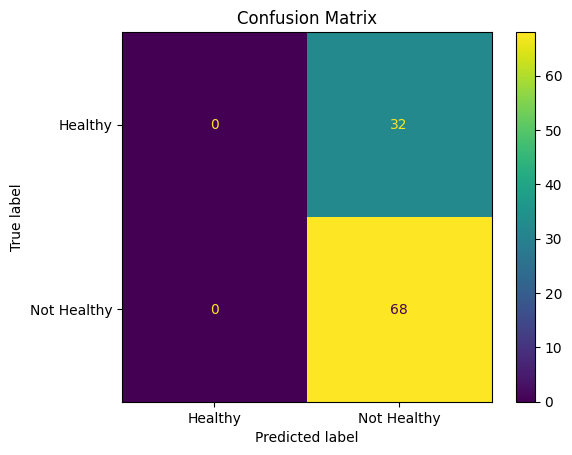

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions and true labels back to class indices
y_pred_classes = np.argmax(y_pred_proba_all, axis=1)
y_true_classes = np.argmax(y_true_all, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
class_report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n     Healthy       0.00      0.00      0.00        32\n Not Healthy       0.68      1.00      0.81        68\n\n    accuracy                           0.68       100\n   macro avg       0.34      0.50      0.40       100\nweighted avg       0.46      0.68      0.55       100\n'

In [16]:
# Analyze confusion matrix results to detect potential pulmonary diseases

# Extracting the confusion matrix values
healthy_detected = conf_matrix[0, 0]  # True Positives for Healthy
not_healthy_detected = conf_matrix[1, 1]  # True Positives for Not Healthy

# Potential detection of pulmonary diseases is related to 'Not Healthy' class
not_healthy_detected

68

- The total potential detection of pulmonary diseases is 68 patients

In [18]:
# Save Model 

import pickle

# Save the trained model to a pickle file
with open('trained_pulmonary_model.pkl', 'wb') as file:
    pickle.dump(model, file)